In [1]:
from tools import *
from plots import *
from images import *
from RegularGrid import RegularGrid

In [2]:
# reload automaticaly external modules
%load_ext autoreload
%autoreload 2

### **Python file**

In [3]:
import random
category_name = f'formatage/{random.randint(0, 999):0>3}'
category_name

'formatage/311'

### **Rows**, **Columns** and more

In [4]:
degree = 3
rows = 4
cols = 1

In [5]:
experiment_name =f'double_hline'
steps = 10
deployment = 'incremental'
# deployment= 'linear'

In [6]:
folder_name , path = \
    create_dir_hierarchy(category_name,
                         degree,
                         rows,
                         cols,
                         deployment,
                         experiment_name)

In [7]:
path

'outputs/formatage/311/03_04_01_double_hline'

In [8]:
grid = RegularGrid(degree, rows, cols)

### **Deployed** and **Undeployed**

In [9]:
undeployed_cells = [grid.numUmbrellas-1]
deployed_cells  = [grid.numUmbrellas-2]

- grid.border()
- grid.center()
- grid.vline(line_idx)
- grid.hline(line_idx)
- grid.cross(arm_length)

---

In [10]:
# extremities
active_cells    = deployed_cells + undeployed_cells
target_percents = [100]*len(deployed_cells) + [0]*len(undeployed_cells) # 0:undeployed | 100:deployed

In [11]:
# linear
# active_cells    = grid.hline(1) + grid.hline(4)
# target_percents = linear_height_ls(grid.hline(1)) + linear_height_ls(grid.hline(4))

In [12]:
for c,p in zip(active_cells, target_percents):
    print(f'cell:target percent - {c:0>2}:{p: >3.0f}%')

cell:target percent - 06:100%
cell:target percent - 07:  0%


In [13]:
# write meta-data
write_metadata(path, degree, rows, cols, deployment, steps, active_cells, target_percents)
# write path
with open("./paths.txt", "a") as f:
    f.write(path+'\n')

In [14]:
grid.generate_mesh(folder_name)

PLATE CHARACTERISTIQUES:
	plate thickness   : 0.023358
	plate edge length : 0.233578


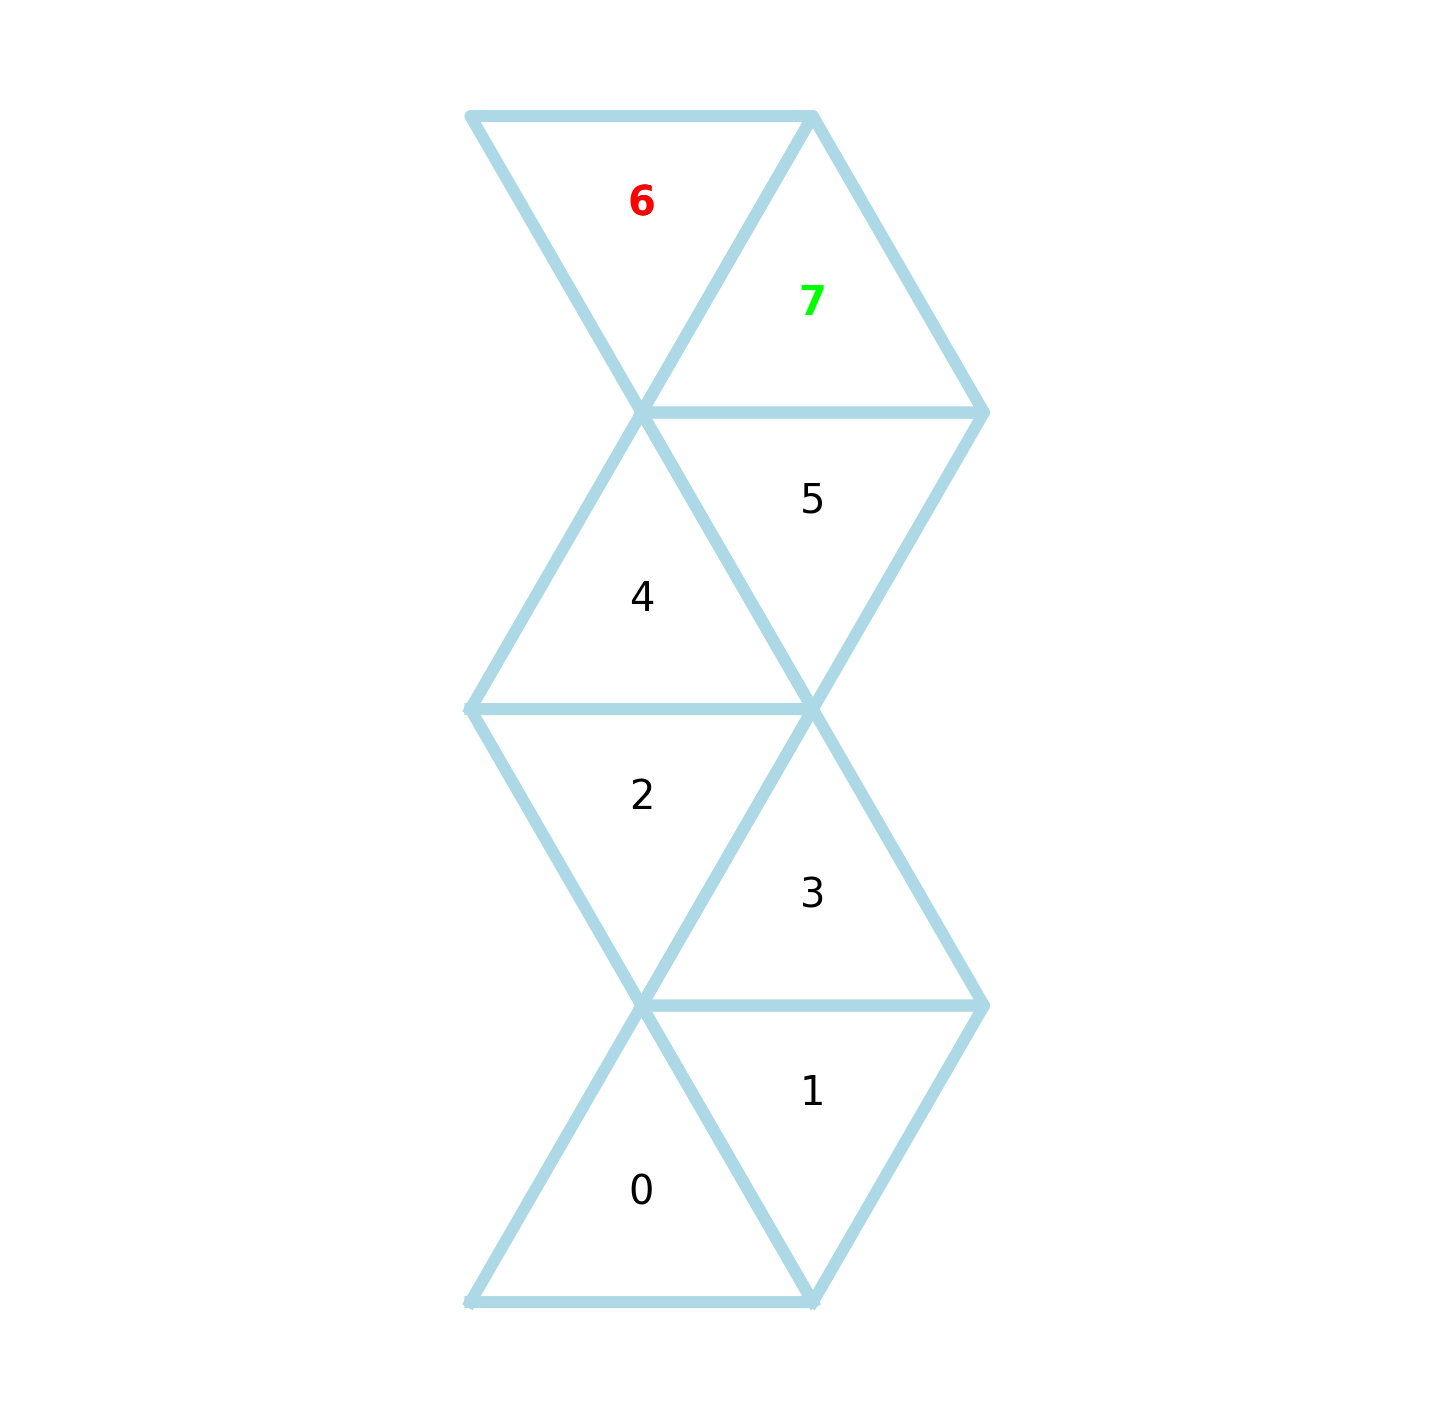

In [15]:
plot2D(grid.input_data, grid.curr_um, show_height=False, active_cells=active_cells, target_percents=target_percents, file_name = path+'/undeployed.png')

### **Step Deployments**

In [16]:
deploy_in_steps(grid.curr_um,
                grid.input_data,
                grid.init_heights,
                grid.plate_thickness,
                active_cells,
                target_percents,
                path,
                deployment,
                steps=steps,
                verbose=True,
                dep=deployment)

step  0/10 saved.
step  1/10 saved.
step  2/10 saved.
step  3/10 saved.
step  4/10 saved.
step  5/10 saved.
step  6/10 saved.
step  7/10 saved.
step  8/10 saved.
step  9/10 saved.
step 10/10 saved.


### **Images**

In [17]:
stress_type = 'maxBending'
verbose=True

In [18]:
# JPG and PNG
generate_2D(path,
            deployment,
            stress_type=stress_type,
            show_percent=False,
            show_plot=False,
            verbose=verbose)

Images for step 00 successfully saved.
Images for step 01 successfully saved.
Images for step 02 successfully saved.
Images for step 03 successfully saved.
Images for step 04 successfully saved.
Images for step 05 successfully saved.
Images for step 06 successfully saved.
Images for step 07 successfully saved.
Images for step 08 successfully saved.
Images for step 09 successfully saved.
Images for step 10 successfully saved.


In [19]:
# GIF:
fps  = 2 # frames per seconds
loop = 2 # -1: no loop | 0: infinit loop | 1: loop once (see image twice) | 2: loop twice | ...

path_base = f'{path}/{deployment}_deployment/stresses/{stress_type}'
for name in ['all', 'perSteps', 'own']:
    img_name_i = f'"{path_base}/jpg/*{name}*.jpg"'
    gif_name_i = f'"{path_base}/jpg/gif/{name}.gif"'
    !ffmpeg  -loglevel panic -f image2 -r $fps -pattern_type glob -i $img_name_i -loop $loop $gif_name_i
    img_name_i = f'{path_base}/png/*{name}*.png'
    gif_name_i = f'{path_base}/png/gif/{name}.gif'
    !gifski --quiet -o $gif_name_i --fps $fps --repeat $loop --quality 100 $img_name_i

    if verbose: print(f'gif for {name} successfully saved.')

gif for all successfully saved.
gif for perSteps successfully saved.
gif for own successfully saved.


In [20]:
generate_1D([path],
            [deployment],
            stress_type=stress_type,
            show_percent=False,
            show_plot=False)

In [21]:
# GIF:

path_ = f'{path}/{deployment}_deployment/stresses/{stress_type}'
# Stresses Curve
img_name_i = f'"{path_}/jpg/stress_curve*.jpg"'
gif_name_i = f'"{path_}/jpg/gif/stress_curve.gif"'
!ffmpeg  -loglevel panic -f image2 -r $fps -pattern_type glob -i $img_name_i -loop $loop $gif_name_i
img_name_i = f'{path_}/png/stress_curve*.png'
gif_name_i = f'{path_}/png/gif/stress_curve.gif'
!gifski --quiet -o $gif_name_i --fps $fps --repeat $loop --quality 100 $img_name_i
# Ordered stresses scatter
img_name_i = f'"{path_}/jpg/ordered_stress_scatter*.jpg"'
gif_name_i = f'"{path_}/jpg/gif/ordered_stress_scatter.gif"'
!ffmpeg  -loglevel panic -f image2 -r $fps -pattern_type glob -i $img_name_i -loop $loop $gif_name_i
img_name_i = f'{path_}/png/ordered_stress_scatter*.png'
gif_name_i = f'{path_}/png/gif/ordered_stress_scatter.gif'
!gifski --quiet -o $gif_name_i --fps $fps --repeat $loop --quality 100 $img_name_i
# Stresses scatter
img_name_i = f'"{path_}/jpg/stress_scatter*.jpg"'
gif_name_i = f'"{path_}/jpg/gif/stress_scatter.gif"'
!ffmpeg  -loglevel panic -f image2 -r $fps -pattern_type glob -i $img_name_i -loop $loop $gif_name_i
img_name_i = f'{path_}/png/stress_scatter*.png'
gif_name_i = f'{path_}/png/gif/stress_scatter.gif'
!gifski --quiet -o $gif_name_i --fps $fps --repeat $loop --quality 100 $img_name_i

In [22]:
# Energies
path_ = f'{path}/{deployment}_deployment/energies'
img_name_i = f'"{path_}/jpg/el_energy*.jpg"'
gif_name_i = f'"{path_}/jpg/gif/el_energy.gif"'
!ffmpeg  -loglevel panic -f image2 -r $fps -pattern_type glob -i $img_name_i -loop $loop $gif_name_i
img_name_i = f'{path_}/png/el_energy*.png'
gif_name_i = f'{path_}/png/gif/el_energy.gif'
!gifski --quiet -o $gif_name_i --fps $fps --repeat $loop --quality 100 $img_name_i

# Heights
path_ = f'{path}/{deployment}_deployment/heights'
img_name_i = f'"{path_}/jpg/heights*.jpg"'
gif_name_i = f'"{path_}/jpg/gif/heights.gif"'
!ffmpeg  -loglevel panic -f image2 -r $fps -pattern_type glob -i $img_name_i -loop $loop $gif_name_i
img_name_i = f'{path_}/png/heights*.png'
gif_name_i = f'{path_}/png/gif/heights.gif'
!gifski --quiet -o $gif_name_i --fps $fps --repeat $loop --quality 100 $img_name_i